# Assignment 3 (alireza Mohammadshafie) Machine Learning

# Import libraries

In [77]:
from sklearn.datasets import make_blobs  
import matplotlib.pyplot as plt  
import numpy as np  

## Generate data

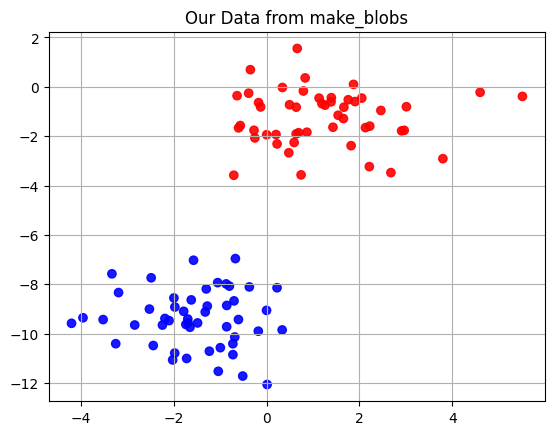

In [78]:
X, y = make_blobs(n_samples=100, centers=2, random_state=2, cluster_std=1.1)  
# Convert labels from {0,1} to {-1, 1} for SVM convention  
y = np.where(y == 0, -1, 1)  

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.9)  
plt.title("Our Data from make_blobs")  
plt.grid()
plt.show()  

# svm

In [79]:
class SimpleLinearSVM:  
    def __init__(self, lr=1e-3, n_iters=1000):  
        self.lr = lr  
        self.n_iters = n_iters  

    def fit(self, X, y):  
        n_samples, n_features = X.shape  
        self.w = np.zeros(n_features)  
        self.b = 0  

        for _ in range(self.n_iters):  
            for idx, x_i in enumerate(X):  
                if y[idx] * (np.dot(x_i, self.w) + self.b) < 1:  
                    self.w += self.lr * y[idx] * x_i  
                    self.b += self.lr * y[idx]  
        return self  

    def decision_function(self, X):  
        return np.dot(X, self.w) + self.b  

    def predict(self, X):  
        return np.sign(self.decision_function(X))  

# fiting svm and plot it

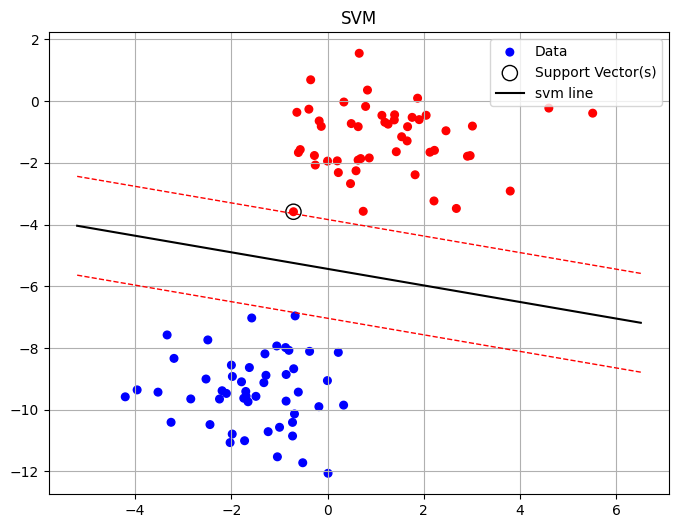

In [80]:
 
svm = SimpleLinearSVM(lr=0.01, n_iters=1000)  
svm.fit(X, y)  

decision_values = y * svm.decision_function(X)  
support_vec_idx = np.where(np.abs(decision_values - 1) < 1e-2)[0]  

plt.figure(figsize=(8,6))  
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=30, label='Data')  
plt.scatter(X[support_vec_idx,0], X[support_vec_idx,1],   
            s=120, facecolors='none', edgecolors='k', label='Support Vector(s)')  
w, b = svm.w, svm.b  
xplot = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)  
yplot = -(w[0]*xplot + b)/w[1]  
plt.plot(xplot, yplot, 'k-', label='svm line')  

margin = 1.0 / np.linalg.norm(w)  
plt.plot(xplot, yplot + margin, 'r--', lw=1)  
plt.plot(xplot, yplot - margin, 'r--', lw=1)  

plt.title("SVM")  
plt.legend()  
plt.grid()
plt.show()  

# Remove the support vector closest to the margin

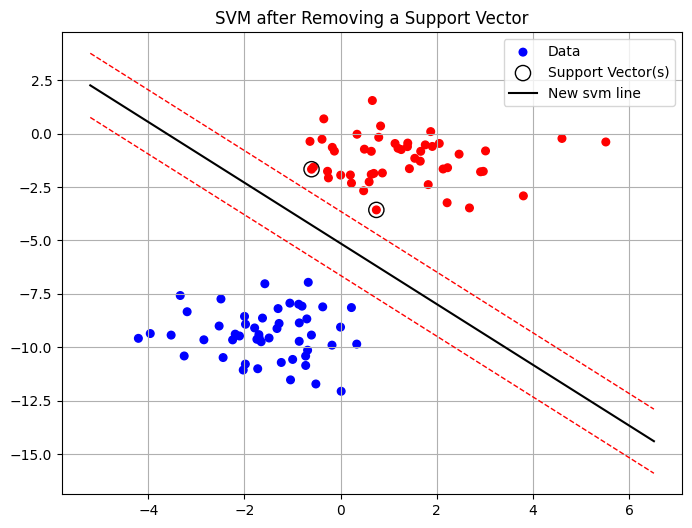

In [81]:
remove_idx = support_vec_idx[0]  
X_new = np.delete(X, remove_idx, axis=0)  
y_new = np.delete(y, remove_idx)  

svm2 = SimpleLinearSVM(lr=0.01, n_iters=1000)  
svm2.fit(X_new, y_new)  
decision_values2 = y_new * svm2.decision_function(X_new)  
support_vec_idx2 = np.where(np.abs(decision_values2 - 1) < 1e-2)[0]  

plt.figure(figsize=(8,6))  
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='bwr', s=30, label='Data')  
plt.scatter(X_new[support_vec_idx2,0], X_new[support_vec_idx2,1],   
            s=120, facecolors='none', edgecolors='k', label='Support Vector(s)')  
w2, b2 = svm2.w, svm2.b  
yplot2 = -(w2[0]*xplot + b2)/w2[1]  
margin2 = 1.0 / np.linalg.norm(w2)  

plt.plot(xplot, yplot2, 'k-', label='New svm line')  
plt.plot(xplot, yplot2 + margin2, 'r--', lw=1)  
plt.plot(xplot, yplot2 - margin2, 'r--', lw=1)  

plt.title("SVM after Removing a Support Vector")  
plt.legend() 
plt.grid()
plt.show()  

### When we remove the closest support vector and retrain the SVM, the decision boundary and margin both change. That shows that the SVM mainly depends on those support vectors for figuring out where to put the hyperplane. If we remove one, especially the closest one, the whole separator can shift, which means support vectors are really important for how SVM works.